In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris = pd.read_csv("iris.csv")

# Assuming last column is the target
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# RBF Kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

Linear SVM Accuracy: 1.0
Linear SVM Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
RBF SVM Accuracy: 1.0
RBF SVM Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Letter Recognition SVM Accuracy: 0.3675
Letter Recognition Confusion Matrix:
 [[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [149   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 68   0  69   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 89   0   0  67   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [124   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [107   0   0   1   0  30   0   0   0   0   0   0   0   0   0   1   0   0
    0   1   0   0   0   0   0   0]
 [157   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [140   0   0   2   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0   0   0   0   0]
 [ 49   0   0   0   0   0   0   0  94   0   0   0 

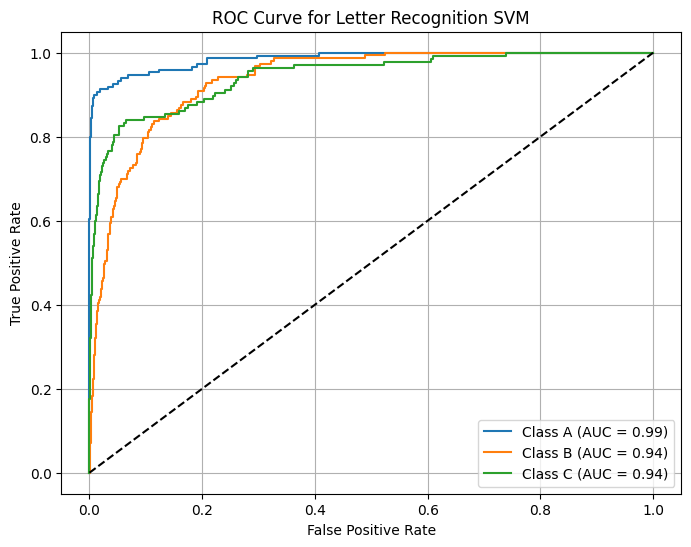

In [9]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.svm import SVC  # Import SVC for the classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Import accuracy_score and confusion_matrix
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load dataset
letter_data = pd.read_csv("letter-recognition.csv")

# Assuming the first column is label
X = letter_data.iloc[:, 1:]
y = letter_data.iloc[:, 0]

# Encode labels and binarize for ROC
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_binarized = label_binarize(y_encoded, classes=range(len(label_encoder.classes_)))

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_scaled, y_binarized, test_size=0.2, random_state=42)

# One-vs-rest strategy for multi-class ROC
svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_classifier.fit(X_train, y_train_bin)
y_score = svm_classifier.decision_function(X_test)

# Accuracy & Confusion Matrix (using original labels for this)
y_pred = svm_classifier.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_bin, axis=1)

print("Letter Recognition SVM Accuracy:", accuracy_score(y_true_labels, y_pred_labels))
print("Letter Recognition Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))

# ROC and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC for first 3 classes (for clarity)
plt.figure(figsize=(8, 6))
for i in range(3):  # Change range to show more classes if needed
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Letter Recognition SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
